<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/customerKmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# KMean Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
#data collection and analysis
mall_customer =  pd.read_csv('/content/Mall_Customers.csv')

In [9]:
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
mall_customer.shape

(200, 5)

In [11]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
mall_customer.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
#choosing annual income and spending score colum
x= mall_customer.iloc[:,[3,4]].values
print(x)

In [12]:
#choosing correct number of cluster
#  WCSS parameter to choose correct number of cluster (Within Cluster Sum of Squares)

In [15]:
# finding WCSS value for different number of cluster
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

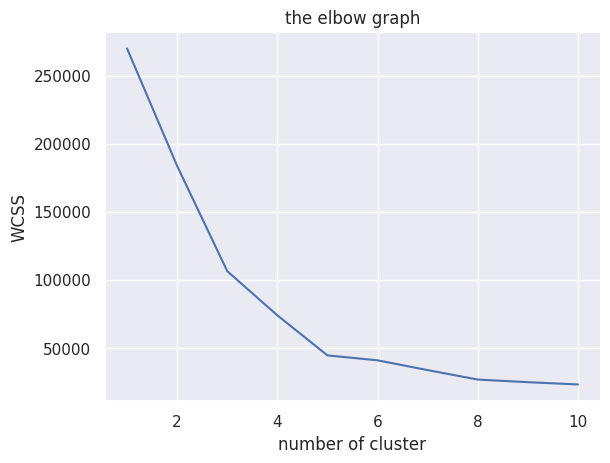

In [16]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('the elbow graph')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')
plt.show()

In [12]:
# here there is two sharp drop , we will take last drop after which there is not sharp drop (elbow points)
# therefore optimum number of cluster will be 5

In [17]:
#training the model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
#return a label for eachcluster group
y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


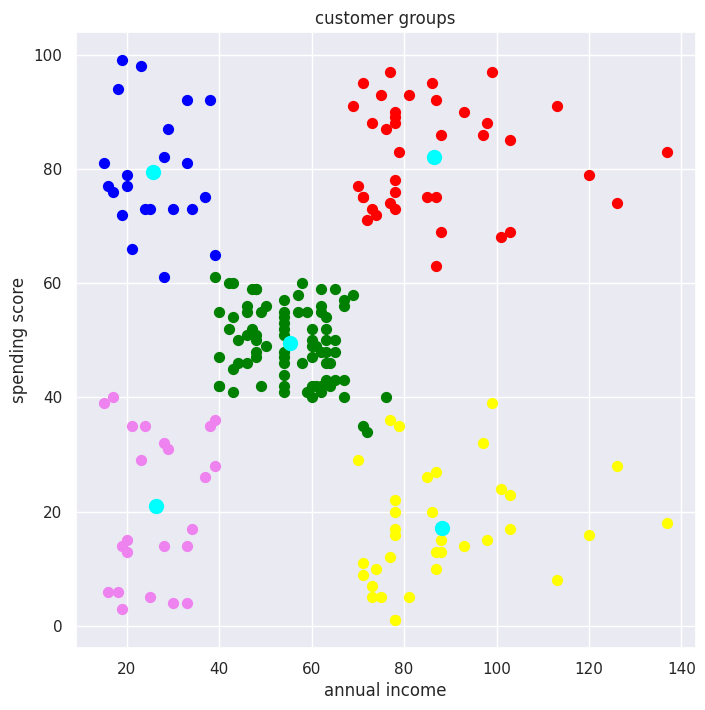

In [18]:
#visualizing all the clusters
#plotting all the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s=50,c='green', label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s=50,c='red', label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s=50,c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1], s=50,c='violet', label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1], s=50,c='blue', label='Cluster 5')
# plot centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan', label='centroids')
plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()